In [37]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from IPython.display import Image 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(
    3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(
    filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(
    filters=128, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))
model.summary()

In [5]:
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.compile(optimizer='adam',
                  loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
%%time
training='cats_n_dogs/train'
validation='cats_n_dogs/validation'
epochs=20

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.01 µs


In [7]:
%%time
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        samplewise_center=True,
        horizontal_flip=True,
        validation_split=0.3,
        rescale=1.0/255
    )

datagen_flow_object = datagen.flow_from_directory(
    training,
    target_size=(150, 150),
    batch_size=64
)

r = model.fit_generator(
    datagen_flow_object, epochs=epochs,
    validation_data=datagen.flow_from_directory(validation,
                                                target_size=(150, 150),
                                                batch_size=64)
)

Found 2000 images belonging to 2 classes.
Found 400 images belonging to 2 classes.
Epoch 1/20
32/32 [==============================] - 67s 2s/step - loss: 0.7180 - accuracy: 0.5045 - val_loss: 0.6874 - val_accuracy: 0.5025
Epoch 2/20
32/32 [==============================] - 69s 2s/step - loss: 0.6865 - accuracy: 0.5335 - val_loss: 0.6673 - val_accuracy: 0.6075
Epoch 3/20
32/32 [==============================] - 70s 2s/step - loss: 0.6774 - accuracy: 0.5755 - val_loss: 0.6844 - val_accuracy: 0.5700
Epoch 4/20
32/32 [==============================] - 81s 3s/step - loss: 0.6687 - accuracy: 0.5945 - val_loss: 0.6494 - val_accuracy: 0.6375
Epoch 5/20
32/32 [==============================] - 78s 2s/step - loss: 0.6587 - accuracy: 0.6090 - val_loss: 0.6764 - val_accuracy: 0.5475
Epoch 6/20
32/32 [==============================] - 78s 2s/step - loss: 0.6457 - accuracy: 0.6375 - val_loss: 0.5905 - val_accuracy: 0.6625
Epoch 7/20
32/32 [==============================] - 68s 2s/step - loss: 0.584

In [12]:
model.evaluate(datagen.flow_from_directory('cats_n_dogs/validation/',target_size=(150,150),batch_size=64))

Found 400 images belonging to 2 classes.
7/7 [==============================] - 2s 339ms/step - loss: 1.1300 - accuracy: 0.7000


[1.1299929107938493, 0.7]

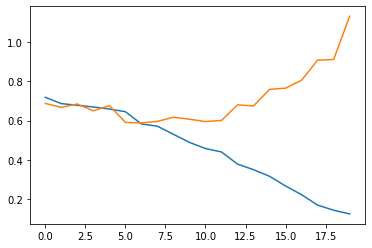

In [15]:
plt.plot(r.history['loss'],label='training_loss')
plt.plot(r.history['val_loss'],label='validation_loss')

In [38]:
datagen_flow_object.class_indices
class_dict={value:key for key,value in datagen_flow_object.class_indices.items()}

In [39]:
def test_prediction(imgpath):
    img=image.load_img(imgpath,target_size=(150,150))
    imagearray=image.img_to_array(img).reshape(1,150,150,3)/255.
    # model.predict(imagearray)
    plt.imshow(img)
    plt.title(class_dict[np.argmax(model.predict(imagearray))])
    plt.axis('off')

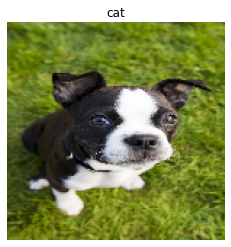

In [40]:
imgpath='internet_test_images/dog2.jpeg'
test_prediction(imgpath)

In [ ]:
newmodel=tf.keras.models.load_model('modelartefacts')

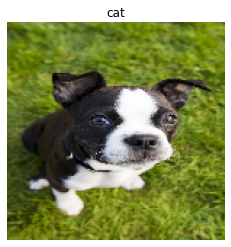

In [43]:
import os
for filename in os.listdir('internet_test_images'):
    test_prediction(os.path.join('internet_test_images',filename))